In [1]:
import pandas as pd
import os
data_dir = "./data"
data_path = os.path.join(data_dir,"poems.csv")
data_df = pd.read_csv(data_path)

D:\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.CSRRD7HKRKC3T3YXA7VY7TAZGLSWDKW6.gfortran-win_amd64.dll
D:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data_df.describe()

,题目,朝代,作者,内容
count,1236863,1219637,1236876,1236875
unique,966952,15,37566,1236874
top,句,宋,陆游,霁烟消处寒犹嫩。乍门巷、愔愔昼永。池塘芳草魂初醒。秀句吟春未稳。仙源阻、春风瘦损。又燕子、来...
freq,4968,585160,20087,2


In [3]:
data_df.head()

,题目,朝代,作者,内容
0,赠歌者杜氏入道三首 其三,元,潘纯,云髻高梳鬓不分，扫除虚室事元君。新糊白纸屏风上，尽画蓬莱五色云。
1,七岁游法兴寺,元,胡天游,山色摇光入袖凉，松阴十丈印回廊。老僧读罢楞严咒，一殿神风柏子香。
2,新岁忆曾子白,元,陈高,经月愁闻雨，新年苦忆君。青华为客久，白发著书勤。酒共邻僧饮，蔬从野老分。何时共登眺，整屐待晴云。
3,城西虎跑寺,元,陈高,石势虎蹲伏，山形龙屈盘。寺开唐殿阁，坟掩宋衣冠。幽涧泉声细，斜阳塔影寒。近城多战鼓，栖息此中安。
4,赠章以元昆仲,元,陈高,相见谈经史，江楼坐夜阑。风声吹屋响，灯影照人寒。俗薄交游尽，时危出处难。衰年逢二妙，亦得闷怀宽。


In [4]:
data_df[data_df["题目"]=="句"].count()

题目    4968
朝代    4967
作者    4968
内容    4968
dtype: int64

 - [Word cloud from a Pandas data frame](https://www.mikulskibartosz.name/word-cloud-from-a-pandas-data-frame/) 
 - [解决Python词云库wordcloud不显示中文的问题](https://blog.csdn.net/xiemanR/article/details/72796739)

In [5]:
    sorter = ["先秦", "汉", "魏晋", "隋", "唐", "五代", "宋", "辽", "金", "元", "明", "清", "民国", "近代", "当代","未知"]
    data_df["朝代"] = data_df["朝代"].astype("category")
    data_df["朝代"].cat.set_categories(sorter, inplace=True)

In [6]:
data_df.groupby(["朝代"]).size()

朝代
先秦      1129
汉        557
魏晋      3133
隋       1652
唐     144763
五代       120
宋     585160
辽         22
金       5815
元      54461
明     254867
清      90587
民国     17313
近代     31850
当代     28208
未知         0
dtype: int64

In [78]:
data_df[data_df["作者"]=="李白"][:10]#.count()

,题目,朝代,作者,内容
79644,九日龙山饮,唐,李白,九日龙山饮，黄花笑逐臣。醉看风落帽，舞爱月留人
79645,九月十日即事,唐,李白,昨日登高罢，今朝更举觞。菊花何太苦，遭此两重阳
79646,上皇西巡南京歌十首 其一,唐,李白,胡尘轻拂建章台，圣主西巡蜀道来。剑壁门高五千尺，石为楼阁九天开
79647,上皇西巡南京歌十首 其二,唐,李白,九天开出一成都，万户千门入画图。草树云山如锦绣，秦川得及此间无
79648,上皇西巡南京歌十首 其三,唐,李白,华阳春树号新丰，行入新都若旧宫。柳色未饶秦地绿，花光不减上阳红
79649,上皇西巡南京歌十首 其四,唐,李白,谁道君王行路难，六龙西幸万人欢。地转锦江成渭水，天回玉垒作长安
79650,上皇西巡南京歌十首 其五,唐,李白,万国同风共一时，锦江何谢曲江池。石镜更明天上月，后宫亲得照蛾眉
79651,上皇西巡南京歌十首 其六,唐,李白,濯锦清江万里流，云帆龙舸下扬州。北地虽誇上林苑，南京还有散花楼
79652,上皇西巡南京歌十首 其七,唐,李白,锦水东流绕锦城，星桥北挂象天星。四海此中朝圣主，峨眉山下列仙庭
79653,上皇西巡南京歌十首 其八,唐,李白,秦开蜀道置金牛，汉水元通星汉流。天子一行遗圣迹，锦城长作帝王州


In [8]:
grouped=data_df.groupby(["朝代","作者"]).size().reset_index(name='count')
grouped.sort_values(["朝代","count"],ascending=[True,False]).groupby("朝代").head(1)

,朝代,作者,count
1,先秦,佚名,457
32,汉,两汉乐府,106
233,魏晋,无名氏,1021
449,隋,无名氏,765
4122,唐,白居易,8582
6229,五代,李煜,22
19949,宋,陆游,20087
21997,辽,萧观音,12
22103,金,李俊民,964
22417,元,刘基,1731


In [10]:
data_df.groupby(["朝代","作者"]).agg(["nunique"]).groupby(["朝代"]).size()

朝代
先秦       31
汉       111
魏晋      263
隋       126
唐      5689
五代       26
宋     15745
辽         7
金       269
元      1455
明      4648
清      8920
民国      108
近代      812
当代      177
dtype: int64

In [11]:
data_df[data_df["作者"]=="龚鼎臣"]

,题目,朝代,作者,内容
261489,句,宋,龚鼎臣,家经武夷住，事与会稽邻。


In [57]:
font_path=os.path.join(data_dir,"..","fonts",'simsun.ttc')
print(font_path)
os.environ['FONT_PATH'] =font_path #linux
# print(font_path)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

stopwords = set(['有','而', '何', '乎', '乃', '其', '且', '若', '所', '为', '焉', '以', '因', '于', '与', '也', '则', '者', '之', '不', '自', '得', '一', '来', '去', '无', '可', '是', '已', '此', '的', '上', '中', '兮', '三'])
cloud = WordCloud(
    # 设置字体，不指定就会出现乱码
    font_path=font_path,
    # font_path=path.join(d,'simsun.ttc'),
    # 设置背景色
    background_color='white',
    # # 词云形状
    # mask=color_mask,
    # 允许最大词汇
    max_words=200,
    # 最大号字体
#     max_font_size=40,
    min_font_size=10,
#     width = 6000,
#     height = 4000,
#     background_color = 'black',
)


def show_wordcloud(text):
    """以空格分隔的字符串"""
    _word_counts = Counter(text.split(" "))
    print(_word_counts.most_common()[:20])
    word_counts={w:c for w,c in _word_counts.items() if w not in stopwords}
    wCloud = cloud.generate_from_frequencies(word_counts)
    wCloud.to_file('cloud.jpg')
    plt.imshow(wCloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

./data\..\fonts\simsun.ttc


In [58]:
import gc
gc.collect()

4343

In [59]:
data_df["内容"]=data_df["内容"].replace("[^\u4E00-\u9FFF]+$","",regex=True) #去除非中文字符
data_df.dropna(subset=['内容'], inplace=True)
# data_df["内容"]=data_df["内容"].replace("<.*>|—","",regex=True)

In [60]:
data_df["内容"].values[853026]

'城上风光莺语乱。城下烟波春拍岸。绿杨芳草几时休，泪眼愁肠先已断。 情怀渐变成衰晚。鸾鉴朱颜惊暗换。昔年多病厌芳尊，今日芳尊惟恐浅'

In [61]:
text="".join(data_df["内容"].values)

In [62]:
Counter(text.split(" ")).most_common()[:20]

[('', 106532),
 ('韩愈', 196),
 ('孟郊', 166),
 ('皎然', 88),
 ('白居易', 44),
 ('刘禹锡', 42),
 ('皮日休', 38),
 ('陆龟蒙', 35),
 ('潘述', 34),
 ('段成式', 34),
 ('汤衡', 26),
 ('李正封', 25),
 ('颜真卿', 22),
 ('崔子向', 22),
 ('张希复', 22),
 ('裴度', 19),
 ('王起', 19),
 ('郑符', 17),
 ('◎唱', 17),
 ('陆羽', 14)]

In [76]:
data_df[data_df["内容"].str.contains("◎唱")]["内容"].values[0]

'◎寿崇节致语隆兴府  万年介寿，星辰拱文母之尊；四海蒙恩，雨露宠周臣之宴。颂声交作，协气横流。与天同心，为民立命。以圣子承承继继，九州番臣；奉太后怡怡愉愉，亿载永久。宝册加徽称于汉典，彩衣绚瑞色于舜庭。捧金炉香，胥庆寿崇之旦；□玉卮酒，永延长乐之春。躬禀聪明，性纯爱敬。晋福介王母，三千年之桃晕新红；华封祝圣人，八九叶之蓂开并绿。耳凤韶之雅奏，身鱼藻之深仁。臣等幸囿明时，忻逢盛事。遥瞻禁卫，蔼播衢谣：东极承颜肃紫宸。恩酉农湛露宴群臣。香传禁柳鸣球瑟，影颤宫花蔼缙绅。璀璨神光三殿晓，怡愉和气万年春。明朝又纪流虹瑞，更效封人祝圣人。  ◎对厅致语  怡愉奉太后，称觞盛长乐之仪；普率皆王臣，会□接镐京之饮。欢浮鱼藻，光射斗牛。恭惟特进大观文大丞相国公四海儒宗，两朝元老。巨川舟楫，旱岁霖雨；不有其功，清时钟鼓，胜事园林，自乐以道。暂游洛社，更筑沙堤。宫使端明相公吟遍玉堂，来寻绿野。听星辰履，久联紫殿之清；依日月光，已觉黄扉之近。宫使阁学尚书为国喉舌，同姓腹心。寄兴西山，虽喜林泉萧散；召还北阙，要推社稷经纶。观使提刑户部曾策驹马因，肯盟鸥鹭。入直天上，尚记青藜；趣起山中，便持紫橐。提刑诏使提刑部洒人寒露，厉古清风。衡岳云开，会见郎官列宿；甘泉地近，即依天子九重。观使提刑判府监丞玉节犹香，幅巾自适。胸中宇宙，素存开济之心；足下风云，直峻清华之武。观使判府刑部老成器局，光霁襟怀。赞白云之司，早培朝望；翔紫霄之表，简在帝心。众位判府郎卿金石舂鸣，琳琅映照。吟万柳阴中之句，香入诏芝；接五花影里之班，望高玉笋。及梓里满前之材俊，皆兰台向上之镃基。我知府、运使、华文、国史、秘监、侍郎，渠观联辉，节麾叠组。不知昼锦为邦家之光、E3CC里之荣；但喜阳春在天庭之间、湖山之外。嘉与十一郡黎献之众，载歌万亿载慈祥之诗。寿崇方庆于坤闱，既醉共分于天禄。合星垣之宾佐，偕月乘之儒流。蓉府材能，柳营韬略。客坐联杏坛之秀，男邦蔼花县之英。笾豆肆陈，笙簧迭奏。福介于王母，幸永瞻慈极之尊；河清生圣人，更同效华对之祝。□等敷陈俚词，扬厉休期。  八叶蓂香夏气清。坤闱有庆佛同生。枫宸称寿云霄迥，苹野沾恩雨露深。祚永万年齐晋福，孝濡九有乐升平。电枢又报祥光绕，虎拜扬休天子明。  ◎唱  金阙深深，正夏日初长禁柳青。祥烟纷簇，红云一朵，飞度彤庭。千妃随步处，觉薰风、微拂觚棱。天颜喜，向东朝长乐，献九霞觥。  分明。西昆

In [63]:
text[:102]

'云髻高梳鬓不分，扫除虚室事元君。新糊白纸屏风上，尽画蓬莱五色云山色摇光入袖凉，松阴十丈印回廊。老僧读罢楞严咒，一殿神风柏子香经月愁闻雨，新年苦忆君。青华为客久，白发著书勤。酒共邻僧饮，蔬从野老分。何时共登'

[('，', 6598696), ('。', 5521558), ('不', 790072), ('人', 631986), ('一', 589025), ('山', 478570), ('', 443308), ('有', 434787), ('风', 412634), ('天', 401544), ('日', 374115), ('无', 370680), ('何', 362635), ('花', 346764), ('春', 318550), ('来', 316579), ('云', 310477), ('中', 305033), ('生', 301563), ('如', 301216)]


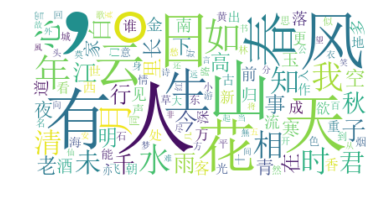

In [56]:
show_wordcloud(" ".join(text))